# Probability of Devleoping Polycystic Ovarian Syndrome in at-risk Patients 

In [4]:
pcos_not_infertility <- read.csv('Downloads/PCOS_data_without_infertility.csv')
pcos_infertility <- read.csv('Downloads/PCOS_with_infertility.csv')

In [3]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(rpart)
library(rpart.plot)
library(caTools)
library(randomForest)

In [5]:
pcos_all <- merge(pcos_not_infertility, pcos_infertility, all = T)
head(pcos_all)

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(1.99, 1.99, 494.08, 1.99, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(1.99, 1.99, 494.08, 1.99, :
“invalid factor level, NA generated”

Sl..No,Patient.File.No.,PCOS..Y.N.,I...beta.HCG.mIU.mL.,II....beta.HCG.mIU.mL.,AMH.ng.mL.,Age..yrs.,Weight..Kg.,Height.Cm.,BMI,...,Fast.food..Y.N.,Reg.Exercise.Y.N.,BP._Systolic..mmHg.,BP._Diastolic..mmHg.,Follicle.No...L.,Follicle.No...R.,Avg..F.size..L...mm.,Avg..F.size..R...mm.,Endometrium..mm.,X
1,1,0,1.99,1.99,2.07,28,44.6,152.0,19.3,...,1,0,110,80,3,3,18,18,8.5,
1,10001,0,1.99,1.99,2.07,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,0,60.80,1.99,1.53,36,65.0,161.5,#NAME?,...,0,0,120,70,3,5,15,14,3.7,
2,10002,0,60.80,1.99,1.53,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1,494.08,494.08,6.63,33,68.8,165.0,#NAME?,...,1,0,120,80,13,15,18,20,10.0,
3,10003,1,494.08,494.08,6.63,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
pcos_all <- na.omit(pcos_all)
pcos_all <- subset(pcos_all, select = -c(Sl..No, Patient.File.No.))

In [7]:
pcos_all$PCOS..Y.N <- sapply(pcos_all$PCOS..Y.N., as.factor)
pcos_all$II....beta.HCG.mIU.mL.<- sapply(pcos_all$I...beta.HCG.mIU.mL., as.numeric)
pcos_all$AMH.ng.mL.<- sapply(pcos_all$AMH.ng.mL., as.numeric)
pcos_all$Age..yrs.<- sapply(pcos_all$Age..yrs., as.numeric)
pcos_all$BMI <- sapply(pcos_all$BMI, as.numeric)
pcos_all$Pregnant.Y.N.<- sapply(pcos_all$Pregnant.Y.N., as.factor)
pcos_all$Waist.Hip.Ratio <- sapply(pcos_all$Waist.Hip.Ratio, as.numeric)
pcos_all$Weight.gain.Y.N.<- sapply(pcos_all$Weight.gain.Y.N., as.factor)
pcos_all$hair.growth.Y.N. <- sapply(pcos_all$hair.growth.Y.N., as.factor)
pcos_all$Skin.darkening..Y.N.<- sapply(pcos_all$Skin.darkening..Y.N., as.factor)
pcos_all$Hair.loss.Y.N.<- sapply(pcos_all$Hair.loss.Y.N., as.factor)
pcos_all$Pimples.Y.N.<- sapply(pcos_all$Pimples.Y.N., as.factor)
pcos_all$Fast.food..Y.N.<- sapply(pcos_all$Fast.food..Y.N., as.factor)
pcos_all$Reg.Exercise.Y.N.<- sapply(pcos_all$Reg.Exercise.Y.N., as.factor)
pcos_all$FSH.LH <- sapply(pcos_all$FSH.LH, as.numeric)

In [8]:
pcos_num <- dplyr::select_if(pcos_all, is.numeric)
pcos_num <- subset(pcos_num, select = -BMI)

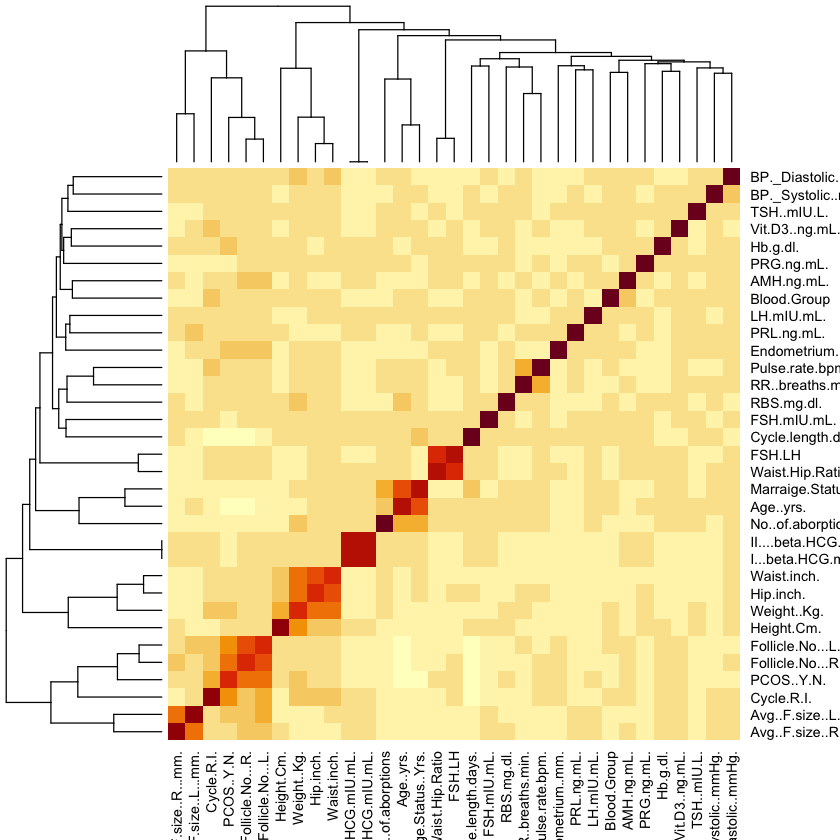

In [9]:
pcos_corr <- cor(pcos_num)
heatmap(pcos_corr)

In [10]:
set.seed(101)
pcos.sample <- sample.split(pcos_all$PCOS..Y.N., SplitRatio=0.8)
pcos.train <- subset(pcos_all, pcos.sample == TRUE)
pcos.test <- subset(pcos_all, pcos.sample == FALSE)

In [11]:
pcos_tree <- rpart(PCOS..Y.N ~ Age..yrs. + Weight..Kg. + Height.Cm. + Hip.inch. 
                   + FSH.LH + II....beta.HCG.mIU.mL. + I...beta.HCG.mIU.mL. 
                   + Waist.Hip.Ratio + Waist.inch. + Avg..F.size..L...mm. + Avg..F.size..R...mm. 
                   + Endometrium..mm., method = 'class', data = pcos.train)

In [12]:
summary(pcos_tree)
printcp(pcos_tree)

Call:
rpart(formula = PCOS..Y.N ~ Age..yrs. + Weight..Kg. + Height.Cm. + 
    Hip.inch. + FSH.LH + II....beta.HCG.mIU.mL. + I...beta.HCG.mIU.mL. + 
    Waist.Hip.Ratio + Waist.inch. + Avg..F.size..L...mm. + Avg..F.size..R...mm. + 
    Endometrium..mm., data = pcos.train, method = "class")
  n= 431 

          CP nsplit rel error    xerror       xstd
1 0.09219858      0 1.0000000 1.0000000 0.06907976
2 0.03546099      1 0.9078014 0.9503546 0.06815110
3 0.01773050      4 0.8014184 0.8652482 0.06632869
4 0.01000000      6 0.7659574 1.0354610 0.06968529

Variable importance
           Weight..Kg.   Avg..F.size..L...mm.              Age..yrs. 
                    21                     15                     12 
             Hip.inch.   Avg..F.size..R...mm.   I...beta.HCG.mIU.mL. 
                    10                     10                      7 
II....beta.HCG.mIU.mL.             Height.Cm.            Waist.inch. 
                     7                      7                      6 
   

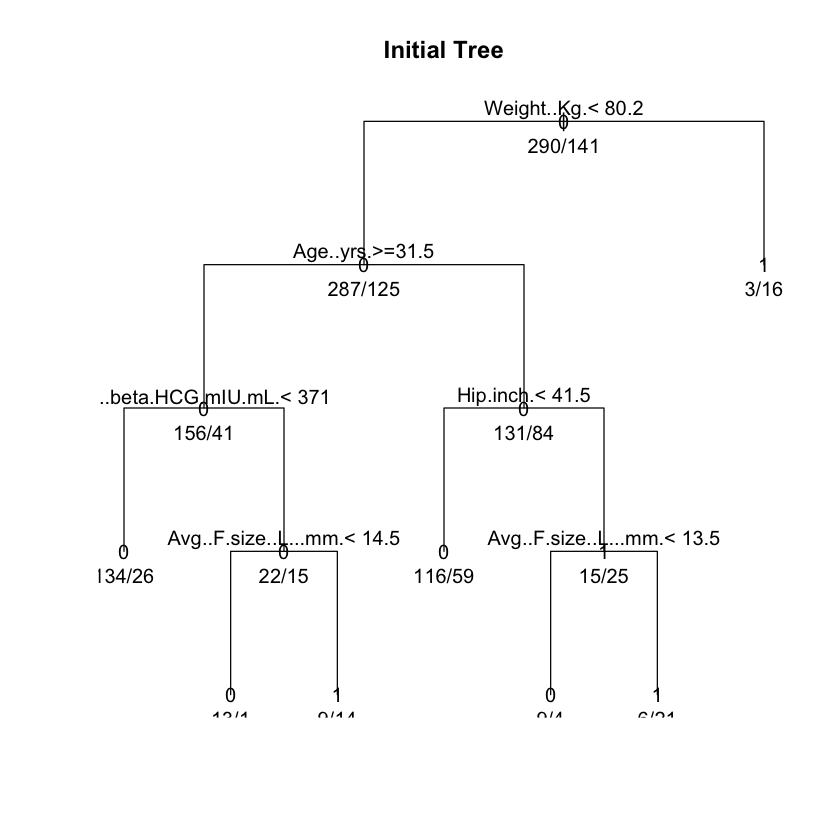

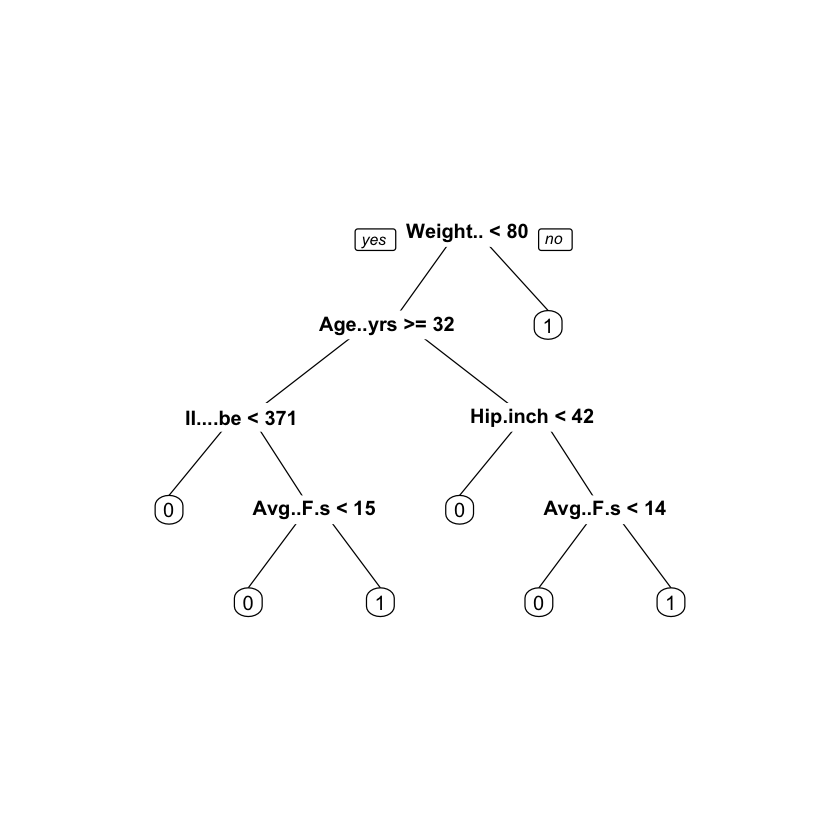

In [13]:
plot(pcos_tree, uniform = T, main = 'Initial Tree')
text(pcos_tree, use.n = T, all = T)
prp(pcos_tree)

In [14]:
pcos_tree.pred <- predict(pcos_tree, pcos.test)
pcos_tree.pred <- as.data.frame(pcos_tree.pred)

pcos_tree.rf.model <- randomForest(PCOS..Y.N ~ Age..yrs. + Weight..Kg. + Height.Cm. + Hip.inch. 
                                   + FSH.LH + II....beta.HCG.mIU.mL. + I...beta.HCG.mIU.mL. 
                                   + Waist.Hip.Ratio + Waist.inch. + Avg..F.size..L...mm. + Avg..F.size..R...mm. 
                                   + Endometrium..mm., data = pcos.train, importance=T)

In [15]:
print(pcos_tree.rf.model)

pcos_tree.rf.model$confusion
pcos_tree.rf.model$importance


Call:
 randomForest(formula = PCOS..Y.N ~ Age..yrs. + Weight..Kg. +      Height.Cm. + Hip.inch. + FSH.LH + II....beta.HCG.mIU.mL. +      I...beta.HCG.mIU.mL. + Waist.Hip.Ratio + Waist.inch. + Avg..F.size..L...mm. +      Avg..F.size..R...mm. + Endometrium..mm., data = pcos.train,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 31.79%
Confusion matrix:
    0  1 class.error
0 258 32   0.1103448
1 105 36   0.7446809


,0,1,class.error
0,258,32,0.1103448
1,105,36,0.7446809


,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Age..yrs.,8.538212e-03,0.017874311,1.162851e-02,22.480304
Weight..Kg.,1.259753e-02,0.017198328,1.414860e-02,27.425303
Height.Cm.,1.495842e-03,-0.002973632,4.080414e-05,17.000253
Hip.inch.,9.422305e-03,0.006357622,8.462740e-03,16.149968
FSH.LH,8.086908e-04,0.001645335,1.089434e-03,1.622228
II....beta.HCG.mIU.mL.,1.496677e-02,-0.005313289,8.150138e-03,17.309104
I...beta.HCG.mIU.mL.,1.901180e-02,-0.003540263,1.149455e-02,17.200916
Waist.Hip.Ratio,8.864256e-04,0.002668826,1.484706e-03,1.637217
Waist.inch.,2.112093e-03,-0.002565279,5.388711e-04,15.965120
Avg..F.size..L...mm.,1.622028e-03,-0.001206593,6.845708e-04,15.315967
